# **Clonazione repository**

In [ ]:
!rm -rf seaborn-data
!git clone https://github.com/mwaskom/seaborn-data.git
%cd seaborn-data

Cloning into 'seaborn-data'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 208 (delta 48), reused 44 (delta 39), pack-reused 142 (from 1)
Receiving objects: 100% (208/208), 7.29 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (87/87), done.
/content/seaborn-data


# **Importazione librerie**

In [ ]:
# Importa librerie
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

## **Lettura e pulizia del dataset**

In [ ]:
# Leggi il dataset
print("\n\n\nCaricamento del dataset...")
df = pd.read_csv("penguins.csv")
print(f"Dimensioni iniziali del dataset: {df.shape}")

# Rimuovi righe con valori NaN nelle colonne specifiche
df_cleaned = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']).copy()

print(f"Dimensioni dopo la rimozione dei valori mancanti: {df_cleaned.shape}")




Caricamento del dataset...
Dimensioni iniziali del dataset: (344, 7)
Dimensioni dopo la rimozione dei valori mancanti: (333, 7)


# **Selezione delle features da utilizzare ell'addestramento**

In [ ]:
# Seleziona le caratteristiche e normalizza
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']  # Puoi aggiungere o modificare le caratteristiche
X = df_cleaned[features]
Y = df_cleaned['sex']
print(f"Caratteristiche selezionate: {features}")

# ** Normalizzazione dei dati**

In [ ]:
# Normalizza i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Caratteristiche normalizzate.")

# **Suddivisione del dataset in training e test**

Caratteristiche normalizzate.
Set di addestramento: (266, 4), Set di test: (67, 4)


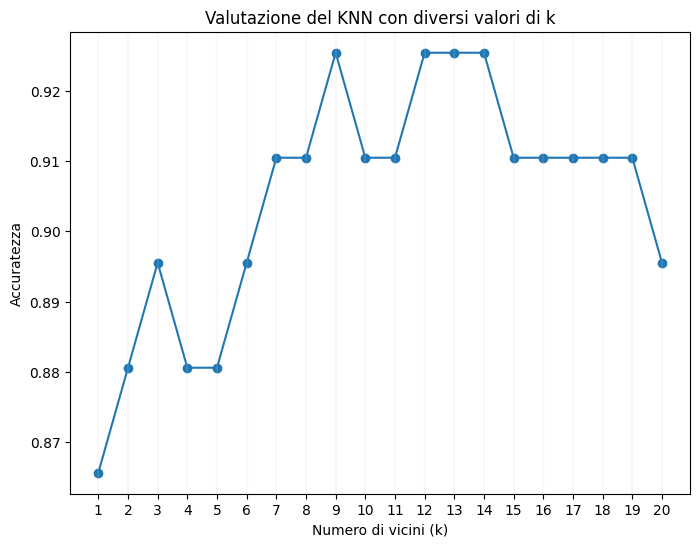

KeyboardInterrupt: Interrupted by user

In [ ]:
# Suddivisione del dataset in training e test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print(f"Set di addestramento: {X_train.shape}, Set di test: {X_test.shape}")

# Test con diverse quantità di vicini
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(Y_test, y_pred_k))

# Visualizza il grafico delle accuratezze
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')

# Aggiungi righe tratteggiate per ogni punto del grafico
for k, accuracy in zip(k_values, accuracy_scores):
    plt.axvline(x=k, color='lightgray', linestyle='-', alpha=0.15)  # Linea verticale per ogni punto

# Imposta l'intervallo dei valori dell'asse x a 1 (di default k_values è già in incrementi di 1)
plt.xticks(k_values)  # Imposta i valori dell'asse x a 1 per ogni k nel range

plt.xlabel('Numero di vicini (k)')
plt.ylabel('Accuratezza')
plt.title('Valutazione del KNN con diversi valori di k')
plt.show()


time.sleep(1)

# Numero di vicini (k) per KNN
k_neighbors = int(input("Inserisci il numero di vicini (k) per KNN: "))

# Applica KNN
print(f"Eseguo KNN con k={k_neighbors}...")
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, Y_train)
#----------------------------------------------------------------------
# Fai previsioni
Y_pred = knn.predict(X_test)

# Calcola e mostra la matrice di confusione
conf_matrix = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=df_cleaned['sex'].unique())
disp.plot(cmap='Blues')
plt.show()

# Calcola le metriche di valutazione
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Aggiungi le etichette originali per il training e le predizioni per il test
X_full = np.vstack((X_train, X_test))  # Combina i dati di addestramento e test
Y_full = np.concatenate((Y_train, Y_pred))  # Etichette: originali per training, predette per test
is_test = np.array([0] * len(Y_train) + [1] * len(Y_pred))  # Flag per distinguere test e training

# Visualizza tutti i dati
plt.figure(figsize=(6, 6))
scatter_plot = sns.scatterplot(
    x=X_full[:, 0],  # Lunghezza del becco
    y=X_full[:, 1],  # Massa corporea
    hue=Y_full,  # Etichette: originali o predette
    style=is_test,  # Differenzia test e training
    palette='Set1',
    s=50
)
plt.title('Classificazione dei Pinguini con KNN')
plt.xlabel('Lunghezza del Becco (mm)')
plt.ylabel('Massa Corporea (g)')

# Personalizza la legenda per i punti Test e Train
handles, labels = scatter_plot.get_legend_handles_labels()
new_labels = labels[:len(set(Y_full))] + ['Train', 'Test']  # Etichette personalizzate
plt.legend(handles, new_labels, title='Legenda', loc='upper right')

plt.show()
